In [4]:
import matplotlib.pyplot as plt
import pandas
import pandas as pd
import seaborn as sns
import json
import os
import deepsig
from IPython.display import display

In [5]:
def convert_to_json_of_arrays(array_of_jsons):
    json_of_arrays = {}

    # Iterate through each JSON in the array
    for json_obj in array_of_jsons:
        for key, value in json_obj.items():
            # Check if the key exists in the new JSON, if not, create an array
            if key not in json_of_arrays:
                json_of_arrays[key] = []

            # Append the value to the corresponding array
            json_of_arrays[key].append(value)

    return json_of_arrays

In [6]:
def read_csv_files_from_folder(folder_path):
    # Initialize an empty list to store DataFrames
    dfs = []

    # Get a list of files in the folder
    file_list = os.listdir(folder_path)

    # Iterate through the files in the folder
    for file_name in file_list:
        # Check if the file has a .csv extension
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)

            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)

            # Append the DataFrame to the list
            dfs.append(df)

    # Concatenate all DataFrames into a single DataFrame
    combined_df = pd.concat(dfs, ignore_index=True)

    return combined_df

In [7]:
def read_json_files_from_folder(folder_path):
    json_list = []

    # Get a list of files in the folder
    file_list = os.listdir(folder_path)

    # Iterate through the files in the folder
    for file_name in file_list:
        # Check if the file has a .json extension
        if file_name.endswith(".json"):
            file_path = os.path.join(folder_path, file_name)

            # Read the contents of the JSON file
            with open(file_path, "r") as file:
                try:
                    # Parse the JSON data and append it to the list
                    json_data = json.load(file)
                    json_list.append(json_data)
                except json.JSONDecodeError:
                    # Handle parsing errors, if any
                    print(f"Error parsing JSON from file: {file_name}")

    return json_list

In [141]:
cols = ['dataset', 'method', 'fitness_rule', 'fitness', 'ACC', 'MCC', 'f1_score', 'avg_odds_diff', 'stat_par_diff', 'eq_opp_diff']

In [142]:
results = read_csv_files_from_folder('../2023-07-26/results')
results.replace({'ftl_mlp_initializer': 'Fair Transition Loss', 'adversarial_debiasing_initializer': 'Adversarial Debiasing', 'gerry_fair_classifier_initializer': 'Gerry Fair Classifier', 'prejudice_remover_initializer': 'Prejudice Remover', 'simple_mlp_initializer': 'Standard MLP (baseline)'}, inplace=True)
results.replace({'adult_dataset_reader': 'Adult Income', 'compas_dataset_reader': 'Compas Recidivism', 'german_dataset_reader': 'German Credit', 'bank_dataset_reader': 'Bank Market'}, inplace=True)
results.rename(columns={'avg_odds_diff': 'Equalized Odds', 'stat_par_diff': 'Statistical Parity', 'eq_opp_diff': 'Equal Opportunity', 'MCC': 'Mathew Correlation', 'ACC': 'Accuracy'}, inplace=True)

In [143]:
fitness_rules_target_metrics = {
    'mcc_parity': ('Mathew Correlation', 'Statistical Parity'),
    'mcc_opportunity': ('Mathew Correlation', 'Equal Opportunity'),
    'mcc_odds': ('Mathew Correlation', 'Equalized Odds'),
    'acc_parity': ('Accuracy', 'Statistical Parity'),
    'acc_opportunity': ('Accuracy', 'Equal Opportunity'),
    'acc_odds': ('Accuracy', 'Equalized Odds')
}

In [144]:
display(results)

,Unnamed: 0,overall_acc,bal_acc,Equalized Odds,disp_imp,Statistical Parity,Equal Opportunity,theil_ind,f1_score,TPR,...,FOR,Accuracy,Mathew Correlation,fitness,solution,tune_results_history,fitness_rule,method,dataset,best_solution_tf_history
0,0,0.849641,0.762227,0.063849,0.314202,0.171645,0.051457,0.124065,0.657431,0.591568,...,0.123747,0.849641,0.568409,0.396764,{'dropout': 0.12850874154175823},"[{'overall_acc': 0.8432835820895522, 'bal_acc'...",mcc_parity,Standard MLP (baseline),Adult Income,"{'loss': [0.40685467879263043, 0.3476325419417..."
1,1,0.836926,0.735445,0.177128,0.915801,0.015586,0.309089,0.141128,0.618962,0.534106,...,0.140893,0.836926,0.529311,0.513724,"{'dropout': 0.12801019666811597, 'privileged_d...","[{'overall_acc': 0.48576561636263127, 'bal_acc...",mcc_parity,Fair Transition Loss,Adult Income,"{'loss': [0.5514689696747151, 0.52750887365140..."
2,2,0.829851,0.697909,0.169023,0.935140,0.009207,0.304896,0.162678,0.559405,0.436941,...,0.161659,0.829851,0.493621,0.484414,{'adversary_loss_weight': 0.2641581309416248},"[{'overall_acc': 0.8322277501381979, 'bal_acc'...",mcc_parity,Adversarial Debiasing,Adult Income,NaN
3,3,0.822664,0.721623,0.151431,0.928655,0.013649,0.254547,0.149844,0.594540,0.519205,...,0.148083,0.822664,0.492562,0.478913,{'eta': 24.678161259347267},"[{'overall_acc': 0.822139303482587, 'bal_acc':...",mcc_parity,Prejudice Remover,Adult Income,NaN
4,4,0.825318,0.687791,0.058623,0.311393,0.117224,0.077212,0.169257,0.540965,0.414699,...,0.167431,0.825318,0.478785,0.361561,"{'C': 2.7809000823690613, 'gamma': 0.01}","[{'overall_acc': 0.8311221669430625, 'bal_acc'...",mcc_parity,Gerry Fair Classifier,Adult Income,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,25,0.852515,0.773817,0.110652,0.255170,0.203169,0.137689,0.118526,0.673839,0.618770,...,0.118212,0.852515,0.583378,0.714826,{'dropout': 0.031170806947044327},"[{'overall_acc': 0.8493642896627971, 'bal_acc'...",acc_opportunity,Standard MLP (baseline),Adult Income,"{'loss': [0.3831082037026907, 0.33695239091176..."
1753,26,0.847872,0.764601,0.038919,0.404617,0.148700,0.021135,0.124376,0.661417,0.599465,...,0.124325,0.847872,0.569713,0.826737,"{'dropout': 0.048006996511106084, 'privileged_...","[{'overall_acc': 0.4347705914870094, 'bal_acc'...",acc_opportunity,Fair Transition Loss,Adult Income,"{'loss': [0.5659523857778902, 0.54456837394613..."
1754,27,0.849420,0.765141,0.050598,0.451171,0.133082,0.052726,0.123162,0.661699,0.599460,...,0.122911,0.849420,0.571280,0.796694,{'adversary_loss_weight': 0.018834197413746947},"[{'overall_acc': 0.845771144278607, 'bal_acc':...",acc_opportunity,Adversarial Debiasing,Adult Income,NaN
1755,28,0.846656,0.767130,0.037617,0.407864,0.151219,0.025163,0.126196,0.668261,0.604500,...,0.127387,0.846656,0.575383,0.821492,{'eta': 0.504924131493664},"[{'overall_acc': 0.8266998341625207, 'bal_acc'...",acc_opportunity,Prejudice Remover,Adult Income,NaN


In [145]:
results['Performance'] = 0
results['Fairness'] = 0
for fitness_rule, (performance_metric, fairness_metric) in fitness_rules_target_metrics.items():
    results.loc[results.fitness_rule == fitness_rule,'Performance'] = results.loc[results.fitness_rule == fitness_rule,performance_metric]
    results.loc[results.fitness_rule == fitness_rule,'Fairness'] = results.loc[results.fitness_rule == fitness_rule,fairness_metric]
display(results)

,Unnamed: 0,overall_acc,bal_acc,Equalized Odds,disp_imp,Statistical Parity,Equal Opportunity,theil_ind,f1_score,TPR,...,Mathew Correlation,fitness,solution,tune_results_history,fitness_rule,method,dataset,best_solution_tf_history,Performance,Fairness
0,0,0.849641,0.762227,0.063849,0.314202,0.171645,0.051457,0.124065,0.657431,0.591568,...,0.568409,0.396764,{'dropout': 0.12850874154175823},"[{'overall_acc': 0.8432835820895522, 'bal_acc'...",mcc_parity,Standard MLP (baseline),Adult Income,"{'loss': [0.40685467879263043, 0.3476325419417...",0.568409,0.171645
1,1,0.836926,0.735445,0.177128,0.915801,0.015586,0.309089,0.141128,0.618962,0.534106,...,0.529311,0.513724,"{'dropout': 0.12801019666811597, 'privileged_d...","[{'overall_acc': 0.48576561636263127, 'bal_acc...",mcc_parity,Fair Transition Loss,Adult Income,"{'loss': [0.5514689696747151, 0.52750887365140...",0.529311,0.015586
2,2,0.829851,0.697909,0.169023,0.935140,0.009207,0.304896,0.162678,0.559405,0.436941,...,0.493621,0.484414,{'adversary_loss_weight': 0.2641581309416248},"[{'overall_acc': 0.8322277501381979, 'bal_acc'...",mcc_parity,Adversarial Debiasing,Adult Income,NaN,0.493621,0.009207
3,3,0.822664,0.721623,0.151431,0.928655,0.013649,0.254547,0.149844,0.594540,0.519205,...,0.492562,0.478913,{'eta': 24.678161259347267},"[{'overall_acc': 0.822139303482587, 'bal_acc':...",mcc_parity,Prejudice Remover,Adult Income,NaN,0.492562,0.013649
4,4,0.825318,0.687791,0.058623,0.311393,0.117224,0.077212,0.169257,0.540965,0.414699,...,0.478785,0.361561,"{'C': 2.7809000823690613, 'gamma': 0.01}","[{'overall_acc': 0.8311221669430625, 'bal_acc'...",mcc_parity,Gerry Fair Classifier,Adult Income,NaN,0.478785,0.117224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,25,0.852515,0.773817,0.110652,0.255170,0.203169,0.137689,0.118526,0.673839,0.618770,...,0.583378,0.714826,{'dropout': 0.031170806947044327},"[{'overall_acc': 0.8493642896627971, 'bal_acc'...",acc_opportunity,Standard MLP (baseline),Adult Income,"{'loss': [0.3831082037026907, 0.33695239091176...",0.852515,0.137689
1753,26,0.847872,0.764601,0.038919,0.404617,0.148700,0.021135,0.124376,0.661417,0.599465,...,0.569713,0.826737,"{'dropout': 0.048006996511106084, 'privileged_...","[{'overall_acc': 0.4347705914870094, 'bal_acc'...",acc_opportunity,Fair Transition Loss,Adult Income,"{'loss': [0.5659523857778902, 0.54456837394613...",0.847872,0.021135
1754,27,0.849420,0.765141,0.050598,0.451171,0.133082,0.052726,0.123162,0.661699,0.599460,...,0.571280,0.796694,{'adversary_loss_weight': 0.018834197413746947},"[{'overall_acc': 0.845771144278607, 'bal_acc':...",acc_opportunity,Adversarial Debiasing,Adult Income,NaN,0.849420,0.052726
1755,28,0.846656,0.767130,0.037617,0.407864,0.151219,0.025163,0.126196,0.668261,0.604500,...,0.575383,0.821492,{'eta': 0.504924131493664},"[{'overall_acc': 0.8266998341625207, 'bal_acc'...",acc_opportunity,Prejudice Remover,Adult Income,NaN,0.846656,0.025163


In [148]:
datasets = results['dataset'].unique().tolist()
datasets

['Adult Income', 'German Credit', 'Compas Recidivism', 'Bank Market']

In [149]:
fitness_rules = results['fitness_rule'].unique().tolist()
fitness_rules

['mcc_parity',
 'mcc_odds',
 'mcc_opportunity',
 'acc_parity',
 'acc_odds',
 'acc_opportunity']

In [150]:
methods = results['method'].unique().tolist()
methods

['Standard MLP (baseline)',
 'Fair Transition Loss',
 'Adversarial Debiasing',
 'Prejudice Remover',
 'Gerry Fair Classifier']

In [45]:
fitness_rule = fitness_rules[3]
by_fitness_rule = results[results.fitness_rule == fitness_rule]
display(by_fitness_rule)

,Unnamed: 0,overall_acc,bal_acc,Equalized Odds,disp_imp,Statistical Parity,Equal Opportunity,theil_ind,f1_score,TPR,...,FOR,Accuracy,Mathew Correlation,fitness,solution,tune_results_history,fitness_rule,method,dataset,best_solution_tf_history
15,15,0.843228,0.766685,0.062203,0.341192,0.178106,0.051438,0.128290,0.668382,0.607052,...,0.129861,0.843228,0.572097,0.665122,{'dropout': 0.14261932612092132},"[{'overall_acc': 0.849502487562189, 'bal_acc':...",acc_parity,Standard MLP (baseline),Adult Income,"{'loss': [0.4008834940273253, 0.34637606560427..."
16,16,0.824655,0.740086,0.160710,0.959851,0.008598,0.263576,0.136689,0.617463,0.572963,...,0.133745,0.824655,0.507182,0.816056,"{'dropout': 0.0515471394887463, 'privileged_de...","[{'overall_acc': 0.3131564400221117, 'bal_acc'...",acc_parity,Fair Transition Loss,Adult Income,"{'loss': [0.5105891143603078, 0.48523056410359..."
17,17,0.822222,0.666746,0.213912,1.206835,0.022551,0.391614,0.173724,0.497500,0.370750,...,0.169044,0.822222,0.442407,0.799671,{'adversary_loss_weight': 0.5466352727176792},"[{'overall_acc': 0.8388612493090105, 'bal_acc'...",acc_parity,Adversarial Debiasing,Adult Income,NaN
18,18,0.825097,0.714724,0.181570,0.986256,0.002395,0.316863,0.151985,0.583465,0.497084,...,0.149946,0.825097,0.488748,0.822702,{'eta': 30.59698079892053},"[{'overall_acc': 0.8325041459369817, 'bal_acc'...",acc_parity,Prejudice Remover,Adult Income,NaN
19,19,0.244887,0.493758,0.002986,1.001597,0.001591,0.005971,0.037092,0.393428,0.987517,...,1.000000,0.244887,-0.097040,0.243296,"{'C': 19.978939056580057, 'gamma': 0.001}","[{'overall_acc': 0.8406578220011056, 'bal_acc'...",acc_parity,Gerry Fair Classifier,Adult Income,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,15,0.845439,0.759170,0.047436,0.331606,0.169357,0.020137,0.124981,0.649975,0.591613,...,0.123671,0.845439,0.556486,0.676083,{'dropout': 0.17820806972062586},"[{'overall_acc': 0.8503316749585407, 'bal_acc'...",acc_parity,Standard MLP (baseline),Adult Income,"{'loss': [0.4175176698103624, 0.35607674700694..."
1743,16,0.821891,0.660532,0.146558,0.904791,0.009898,0.278807,0.183646,0.486452,0.342767,...,0.179862,0.821891,0.459518,0.811992,"{'dropout': 0.11575434699639507, 'privileged_d...","[{'overall_acc': 0.4444444444444444, 'bal_acc'...",acc_parity,Fair Transition Loss,Adult Income,"{'loss': [0.7348981158179555, 0.71037312025937..."
1744,17,0.833389,0.702379,0.161311,0.824562,0.025520,0.304749,0.161584,0.569059,0.440851,...,0.161691,0.833389,0.509254,0.807868,{'adversary_loss_weight': 0.2239978368008819},"[{'overall_acc': 0.8253178551686015, 'bal_acc'...",acc_parity,Adversarial Debiasing,Adult Income,NaN
1745,18,0.826092,0.714628,0.183541,1.060434,0.010215,0.300326,0.150739,0.582426,0.496830,...,0.148410,0.826092,0.488204,0.815877,{'eta': 32.19406695800905},"[{'overall_acc': 0.8208955223880597, 'bal_acc'...",acc_parity,Prejudice Remover,Adult Income,NaN


<Axes: xlabel='Statistical Parity', ylabel='Accuracy'>

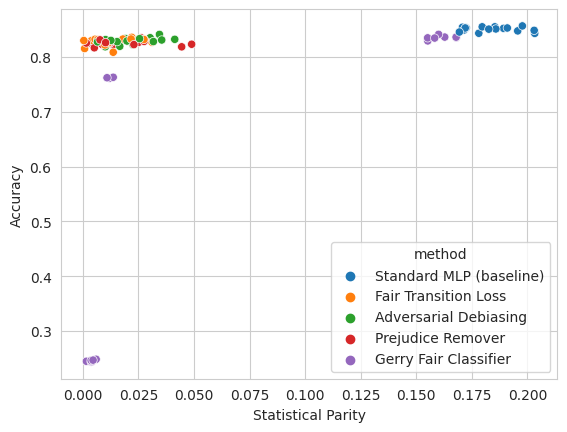

In [124]:
performance_metric = fitness_rules_target_metrics[fitness_rule]['performance']
fairness_metric = fitness_rules_target_metrics[fitness_rule]['fairness']
sns.scatterplot(by_fitness_rule[by_fitness_rule.dataset=='Adult Income'], x=fairness_metric, y=performance_metric, hue='method')

<Axes: xlabel='Equalized Odds', ylabel='Accuracy'>

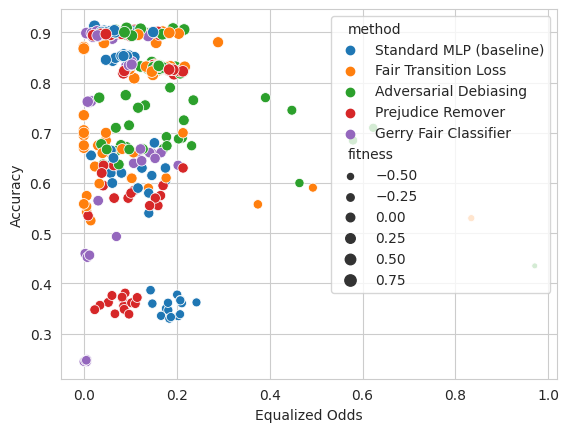

In [176]:
sns.scatterplot(by_fitness_rule, x=fairness_metric, y=performance_metric, hue='method', size='fitness')


/home/canalli/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserW

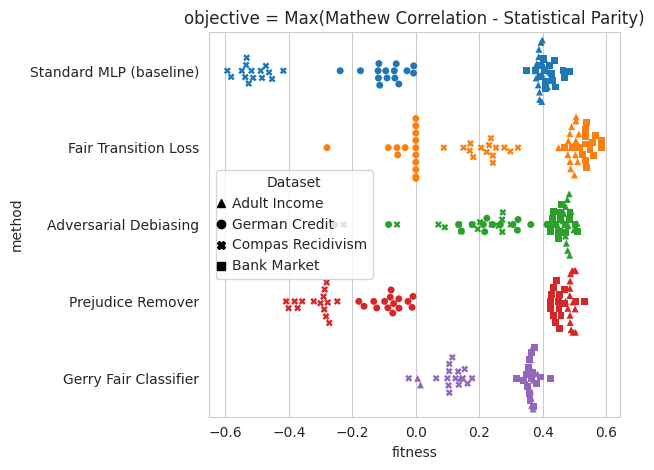

/home/canalli/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


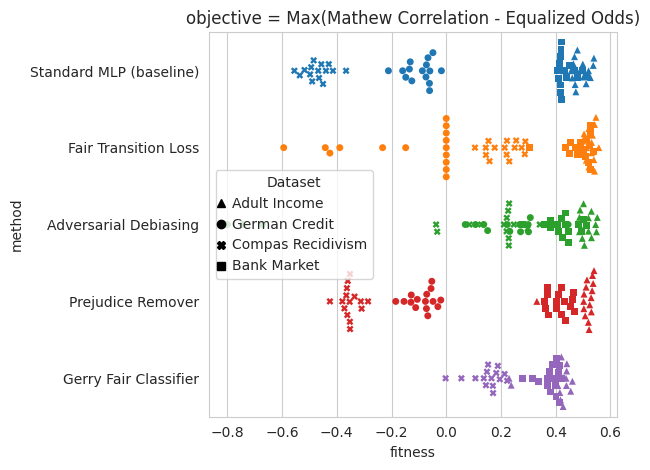

/home/canalli/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


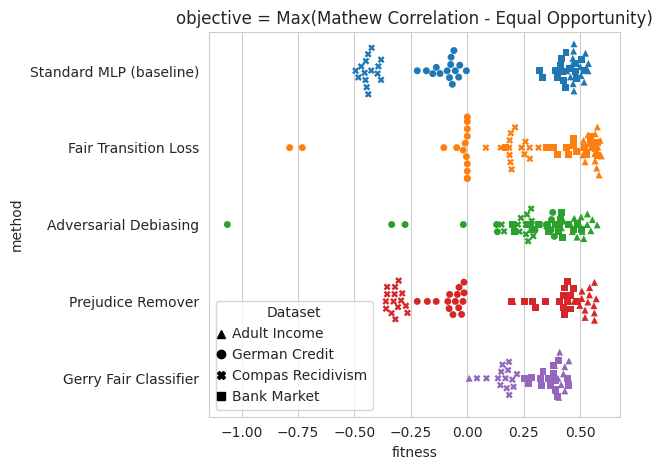

/home/canalli/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: Us

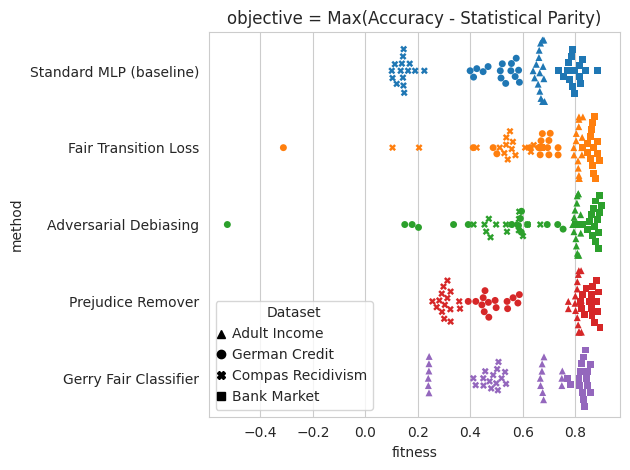

/home/canalli/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserW

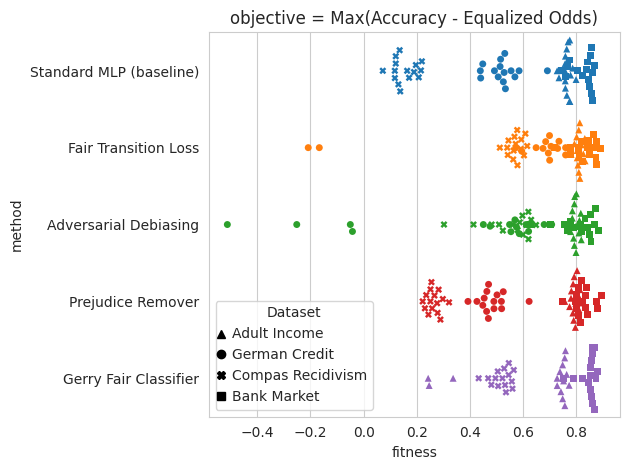

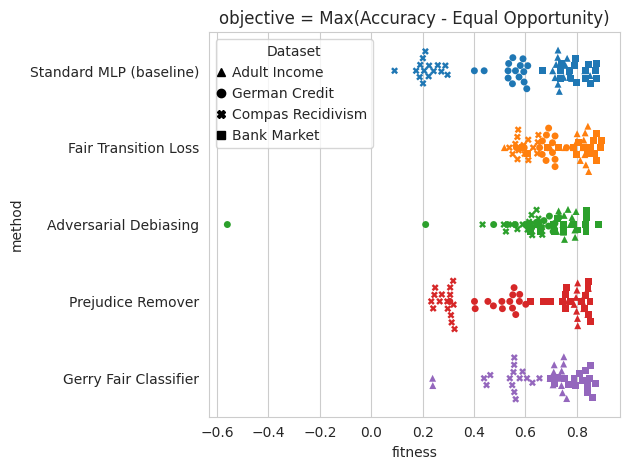

In [212]:
for fitness_rule in fitness_rules:
    by_fitness_rule = results[results.fitness_rule == fitness_rule]    
    ax = plt.gca()
    markers = ['^', 'o', 'X', 's']
    marker_handles = [plt.Line2D([0], [0], marker=marker,
                                 label=dataset, color='black', markerfacecolor='black') for dataset, marker in zip(datasets, markers)]
    for dataset, marker in zip(datasets, markers):
        sns.swarmplot(data=by_fitness_rule[by_fitness_rule.dataset == dataset], hue_order=methods,
                      x='fitness', y='method', marker=marker, hue='method', legend=False)
    ax.legend(handles=marker_handles, title="Dataset",  handlelength=0 )
    plt.title('objective = Max(%s - %s)' % fitness_rules_target_metrics[fitness_rule])
    plt.tight_layout()
    plt.savefig('swarmplot_%s.png' % fitness_rule)
    plt.show()

<Axes: xlabel='fitness', ylabel='method'>

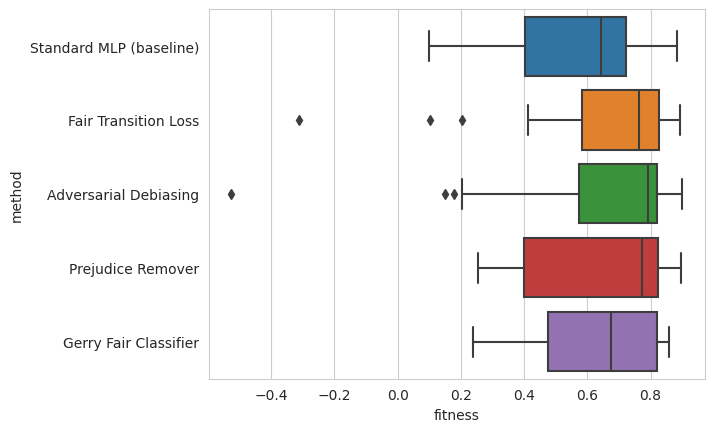

In [44]:
sns.boxplot(by_fitness_rule, x='fitness', y='method')

In [ ]:
sns.pairplot(by_fitness_rule, hue="method", palette="Set2", diag_kind="kde", height=2.5)

/home/canalli/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


/home/canalli/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


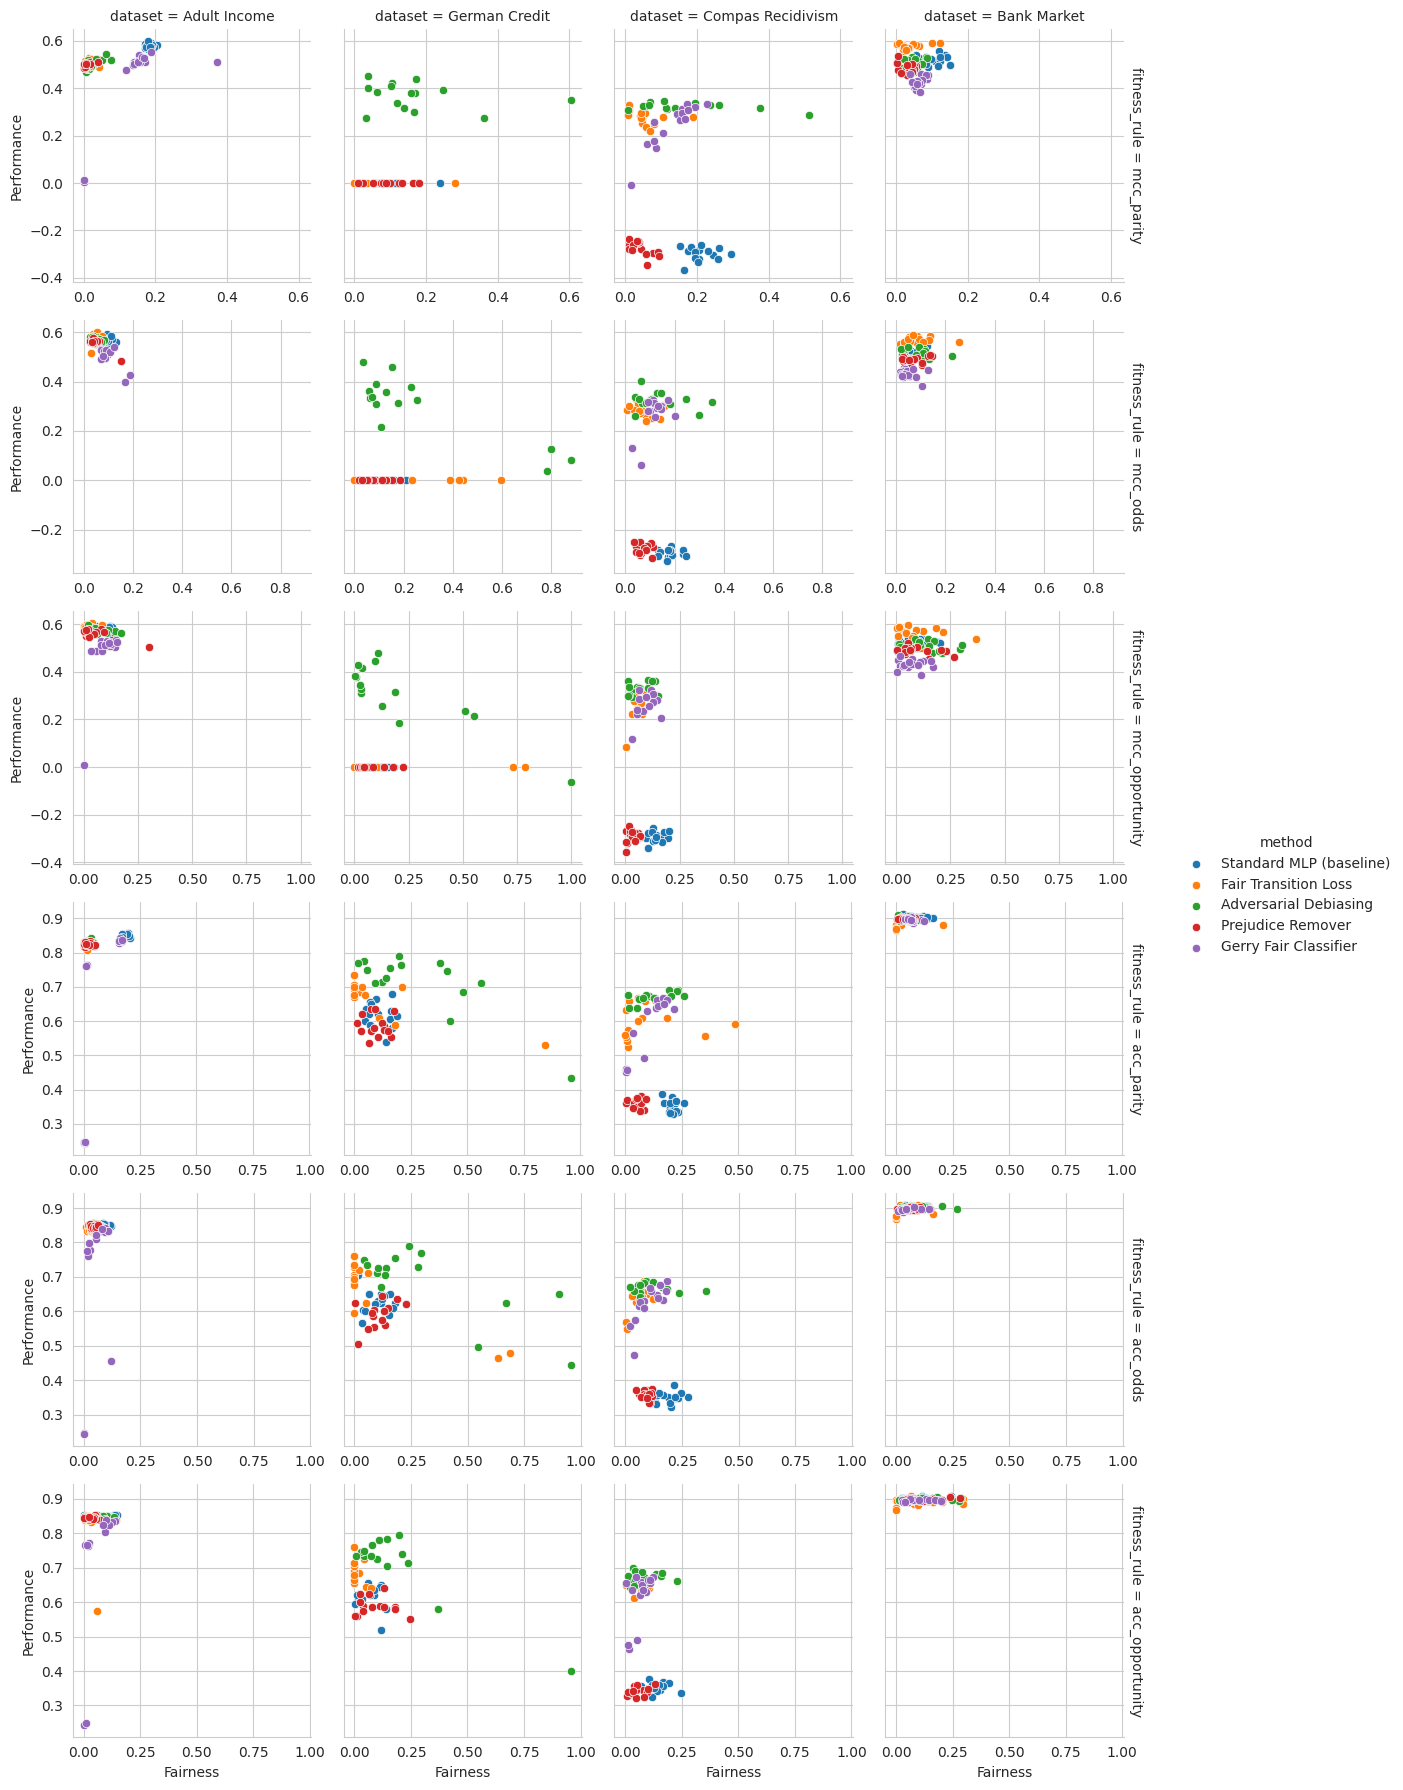

In [152]:
g = sns.FacetGrid(results, col="dataset", row='fitness_rule', hue='method', margin_titles=True, sharex='row', sharey='row')
g.map(sns.scatterplot, 'Fairness', 'Performance')
g.add_legend()

/home/canalli/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/canalli/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/canalli/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 25.0% of the

/home/canalli/.local/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


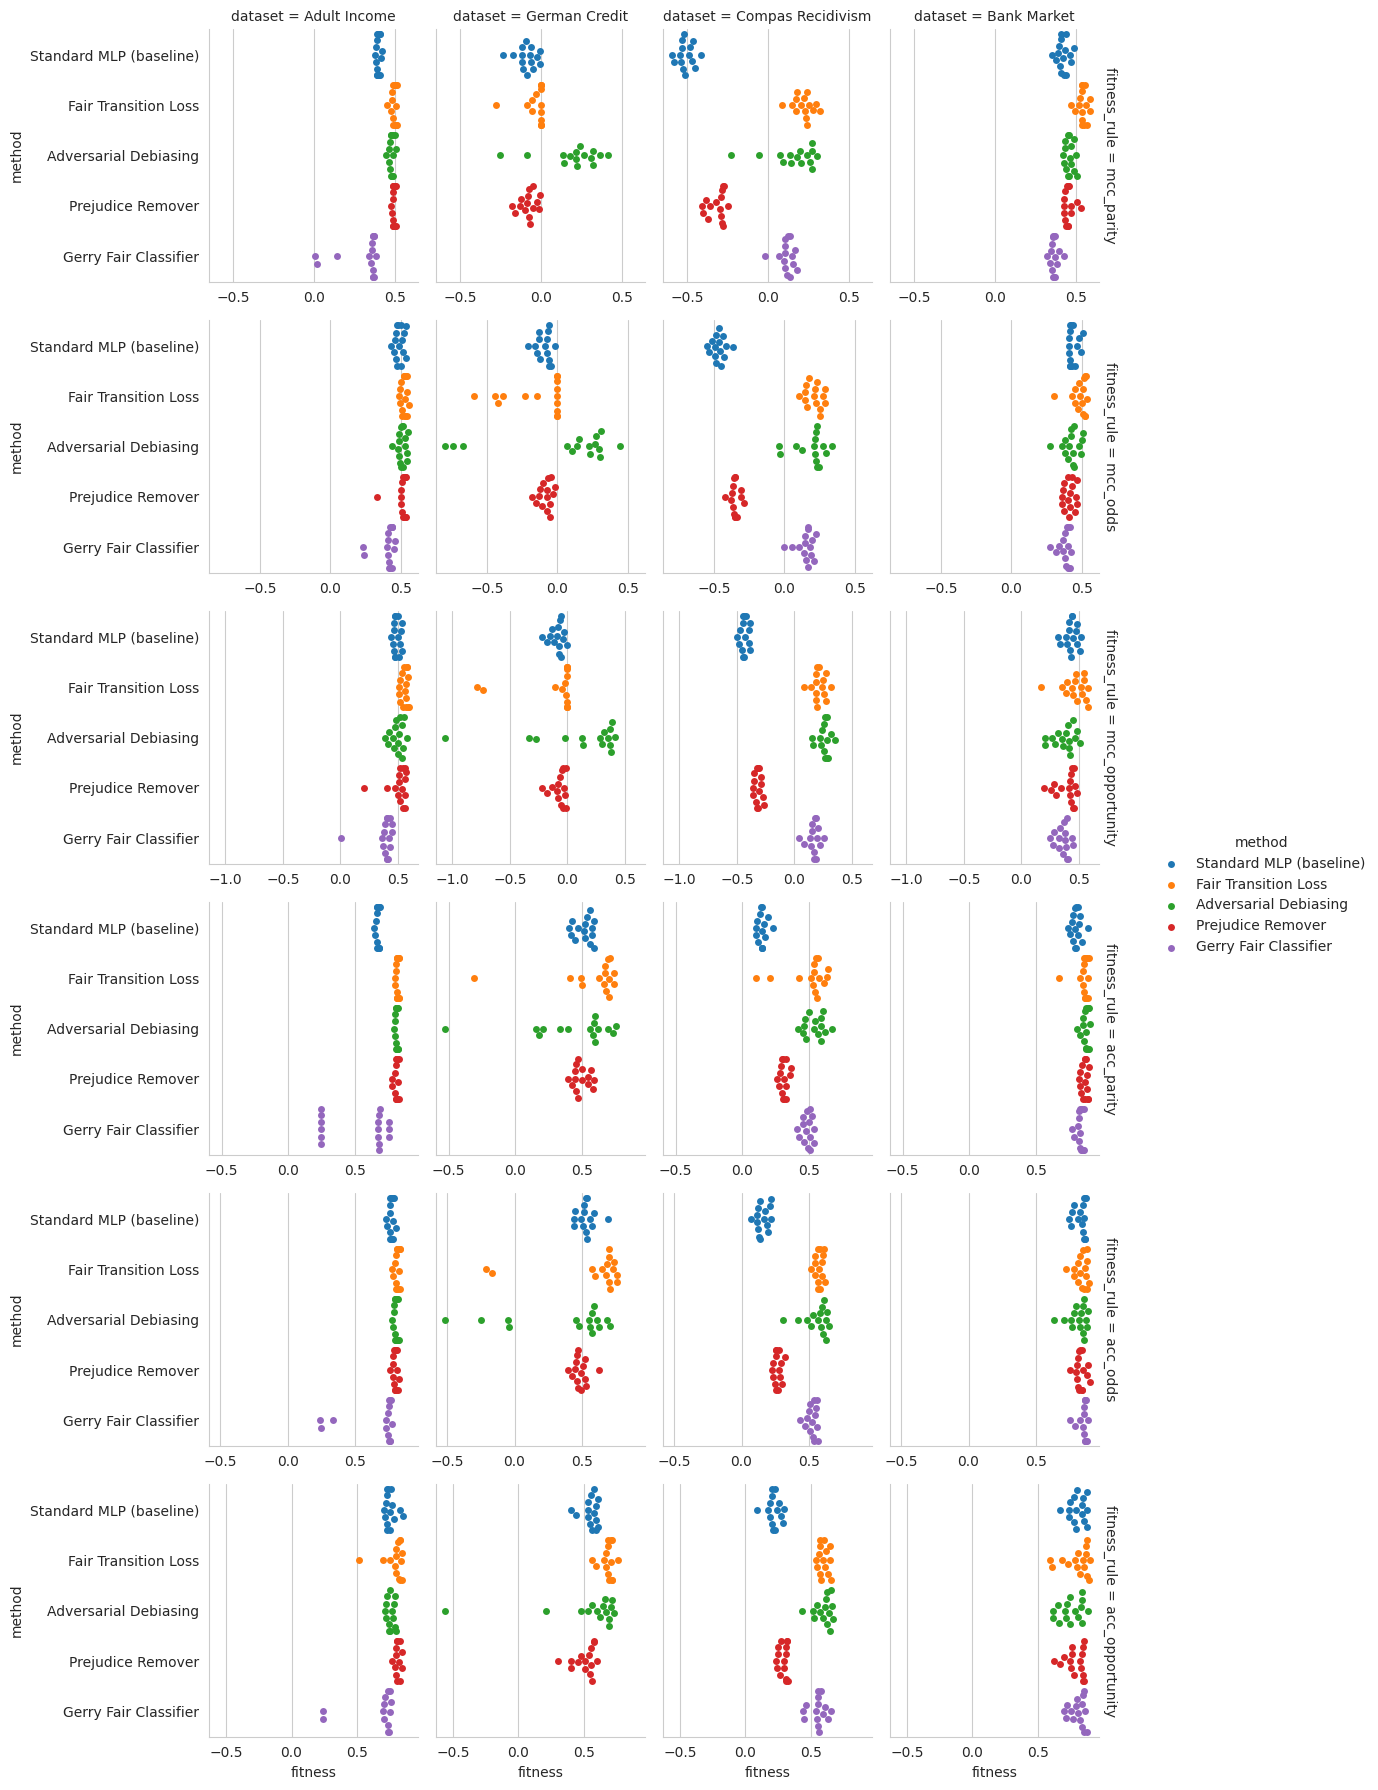

In [162]:
g = sns.FacetGrid(results, col="dataset", row='fitness_rule', hue='method', margin_titles=True, sharex='row', sharey='row')
g.map(sns.swarmplot, 'fitness', 'method')
g.add_legend()